In [2]:
import pandas as pd
import numpy as np
import os
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

SURVEY_SUMMARY_PATH = r'E:\Met_Council\metc-asim-model\Input_2022\Visualizer\census'
ASIM_OUTPUT = r"E:\Met_Council\metc-asim-model\Base_2018\activitysim\output"

observed_auto_ownership = pd.read_csv(os.path.join(SURVEY_SUMMARY_PATH, "autoOwnershipCensus_2021.csv"))
model_hh = pd.read_csv(os.path.join(ASIM_OUTPUT, 'final_households.csv'))

In [3]:
mod = model_hh.groupby(['home_county', 'auto_ownership']).agg(model_pct = ('household_id', 'count')) / model_hh.groupby(['home_county']).agg(model_pct = ('household_id', 'count'))

modt = (model_hh.groupby('auto_ownership').agg(model_pct = ('household_id', 'count')) / model_hh.shape[0]).assign(home_county = 'Total').reset_index().set_index(['home_county', 'auto_ownership'])

mod = pd.concat([mod, modt])
mod_total = model_hh.groupby('auto_ownership').agg(model_pct = ('household_id', 'count')) / model_hh['household_id'].count()

In [4]:
obs = observed_auto_ownership.rename(columns = {'COUNTY': 'home_county', 'HHVEH': 'auto_ownership'}).groupby(['home_county', 'auto_ownership']).agg(census_pct = ('freq', 'sum')) / observed_auto_ownership.rename(columns = {'COUNTY': 'home_county', 'HHVEH': 'auto_ownership'}).groupby(['home_county']).agg(census_pct = ('freq', 'sum'))
obs_total = observed_auto_ownership.rename(columns = {'COUNTY': 'home_county', 'HHVEH': 'auto_ownership'}).groupby('auto_ownership').agg(census_pct = ('freq', 'sum')) / observed_auto_ownership['freq'].sum()

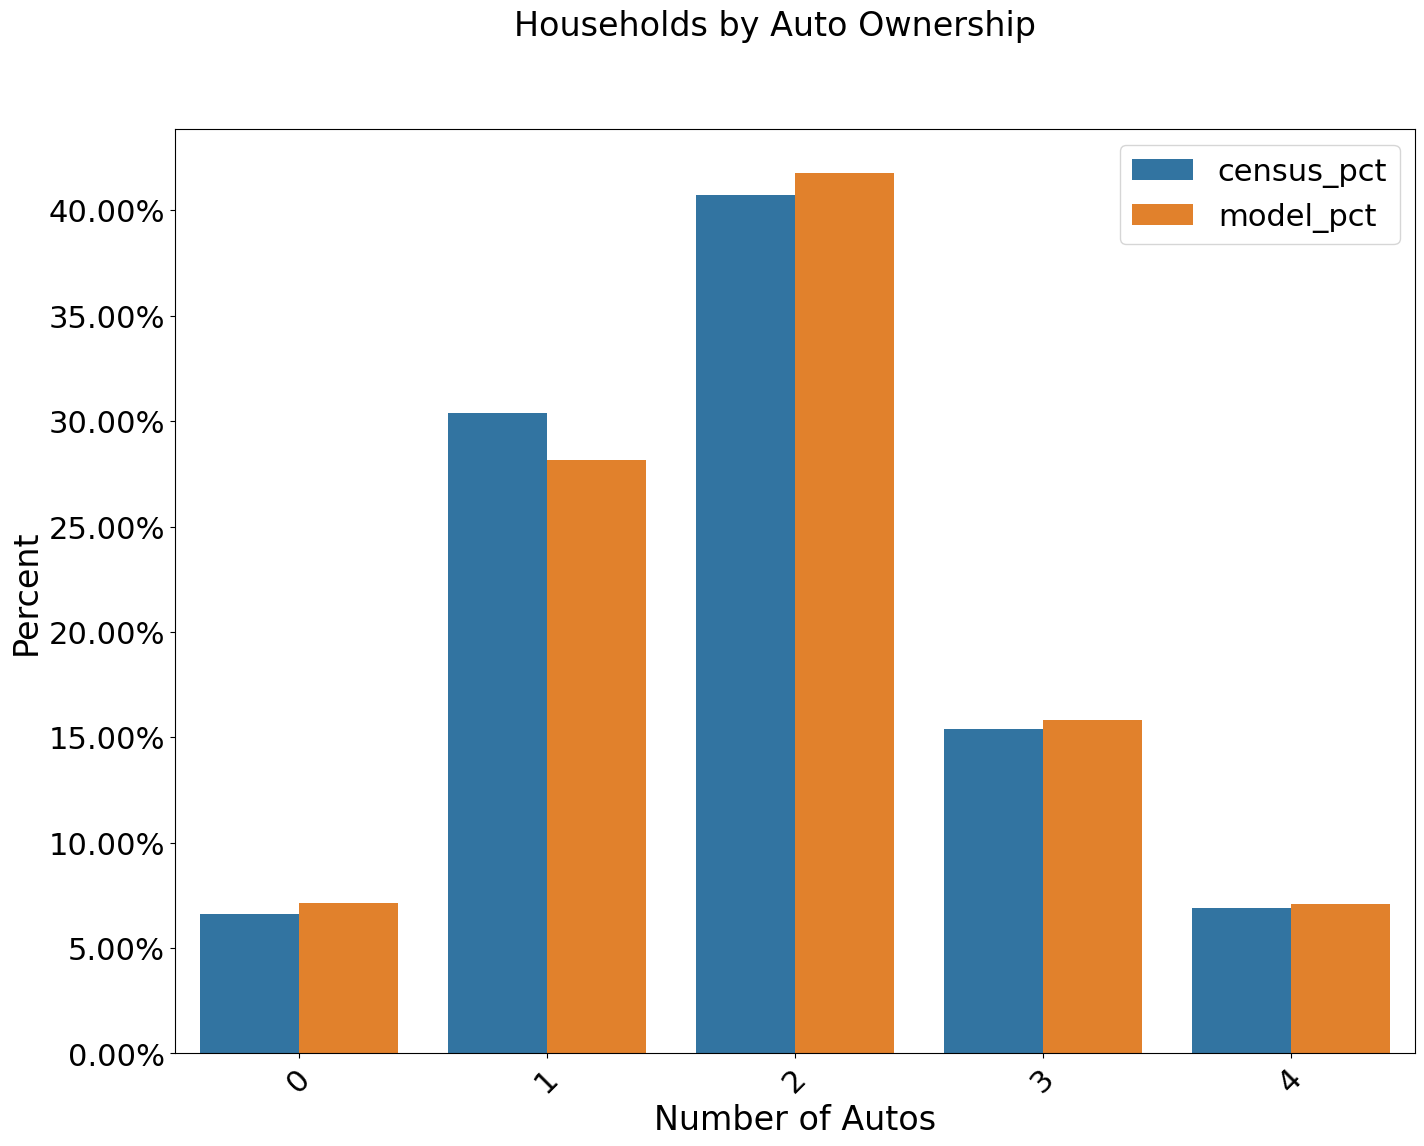

In [5]:
plot_data_total = obs_total.join(mod_total).fillna(0).reset_index().melt(id_vars = 'auto_ownership', value_vars = ['census_pct', 'model_pct'])

fig, ax = plt.subplots(figsize=(16, 12))
fig.suptitle(f"Households by Auto Ownership", fontsize=24)
sns.barplot(data=plot_data_total, x='auto_ownership', y='value', hue='variable')
plt.legend(fontsize=22)
plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel('Percent', fontsize=24)
plt.xlabel('Number of Autos', fontsize=24)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.2%}'))

In [6]:
plot_data_total.pivot(index = 'auto_ownership', columns = 'variable', values = 'value').style.format('{:.2%}')

variable,census_pct,model_pct
auto_ownership,,
0,6.62%,7.16%
1,30.40%,28.16%
2,40.71%,41.75%
3,15.37%,15.84%
4,6.90%,7.09%


# Zero Auto HHs

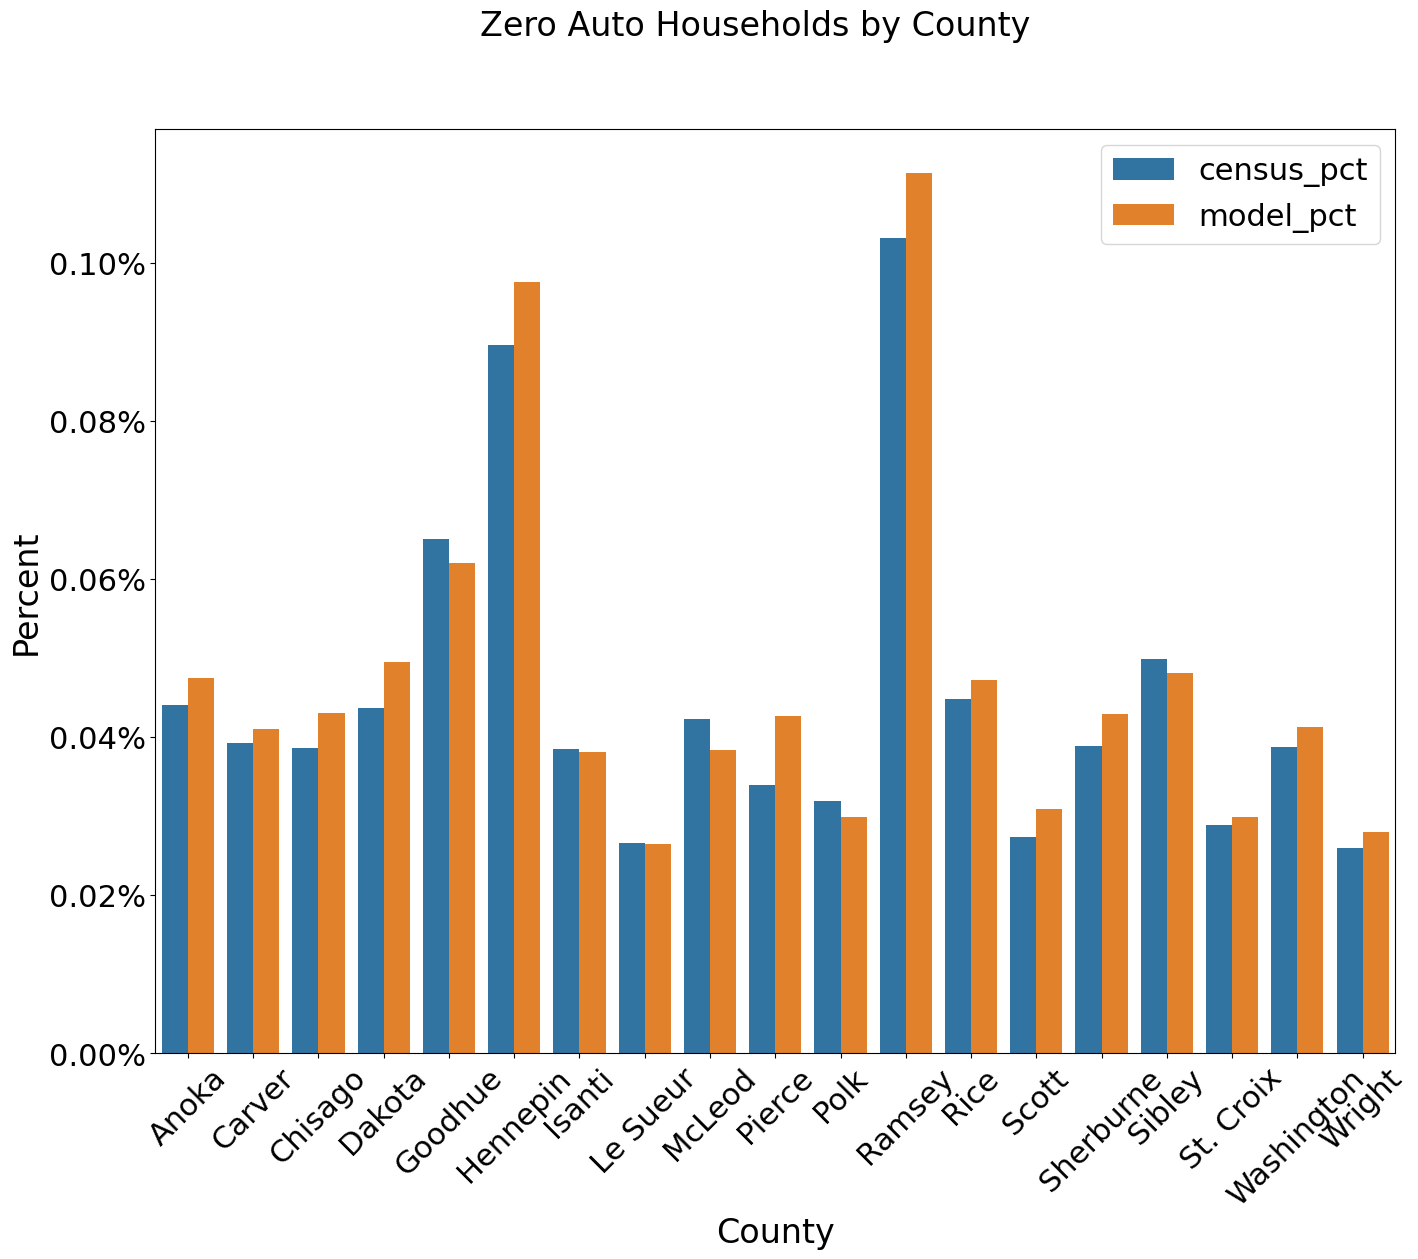

In [7]:
plot_data = obs.join(mod).query("auto_ownership == 0").fillna(0).reset_index().melt(id_vars = 'home_county', value_vars = ['census_pct', 'model_pct'])

fig, ax = plt.subplots(figsize=(16, 12))
fig.suptitle(f"Zero Auto Households by County", fontsize=24)
sns.barplot(data=plot_data, x='home_county', y='value', hue='variable')
plt.legend(fontsize=22)
plt.xticks(rotation=45, fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel('Percent', fontsize=24)
plt.xlabel('County', fontsize=24)
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.2f}%'))

In [8]:
#plot_data = obs.join(mod).query("auto_ownership == 0").fillna(0).reset_index().melt(id_vars = 'home_county', value_vars = ['census_pct', 'model_pct'])

# Auto Ownership by County

In [9]:
plot_data = obs.join(mod).fillna(0).reset_index().melt(id_vars = ['home_county', 'auto_ownership'], value_vars = ['census_pct', 'model_pct'])
plot_data.loc[plot_data['variable'] == 'census_pct', 'variable'] = 'Census'
plot_data.loc[plot_data['variable'] == 'model_pct', 'variable'] = 'ActivitySim'

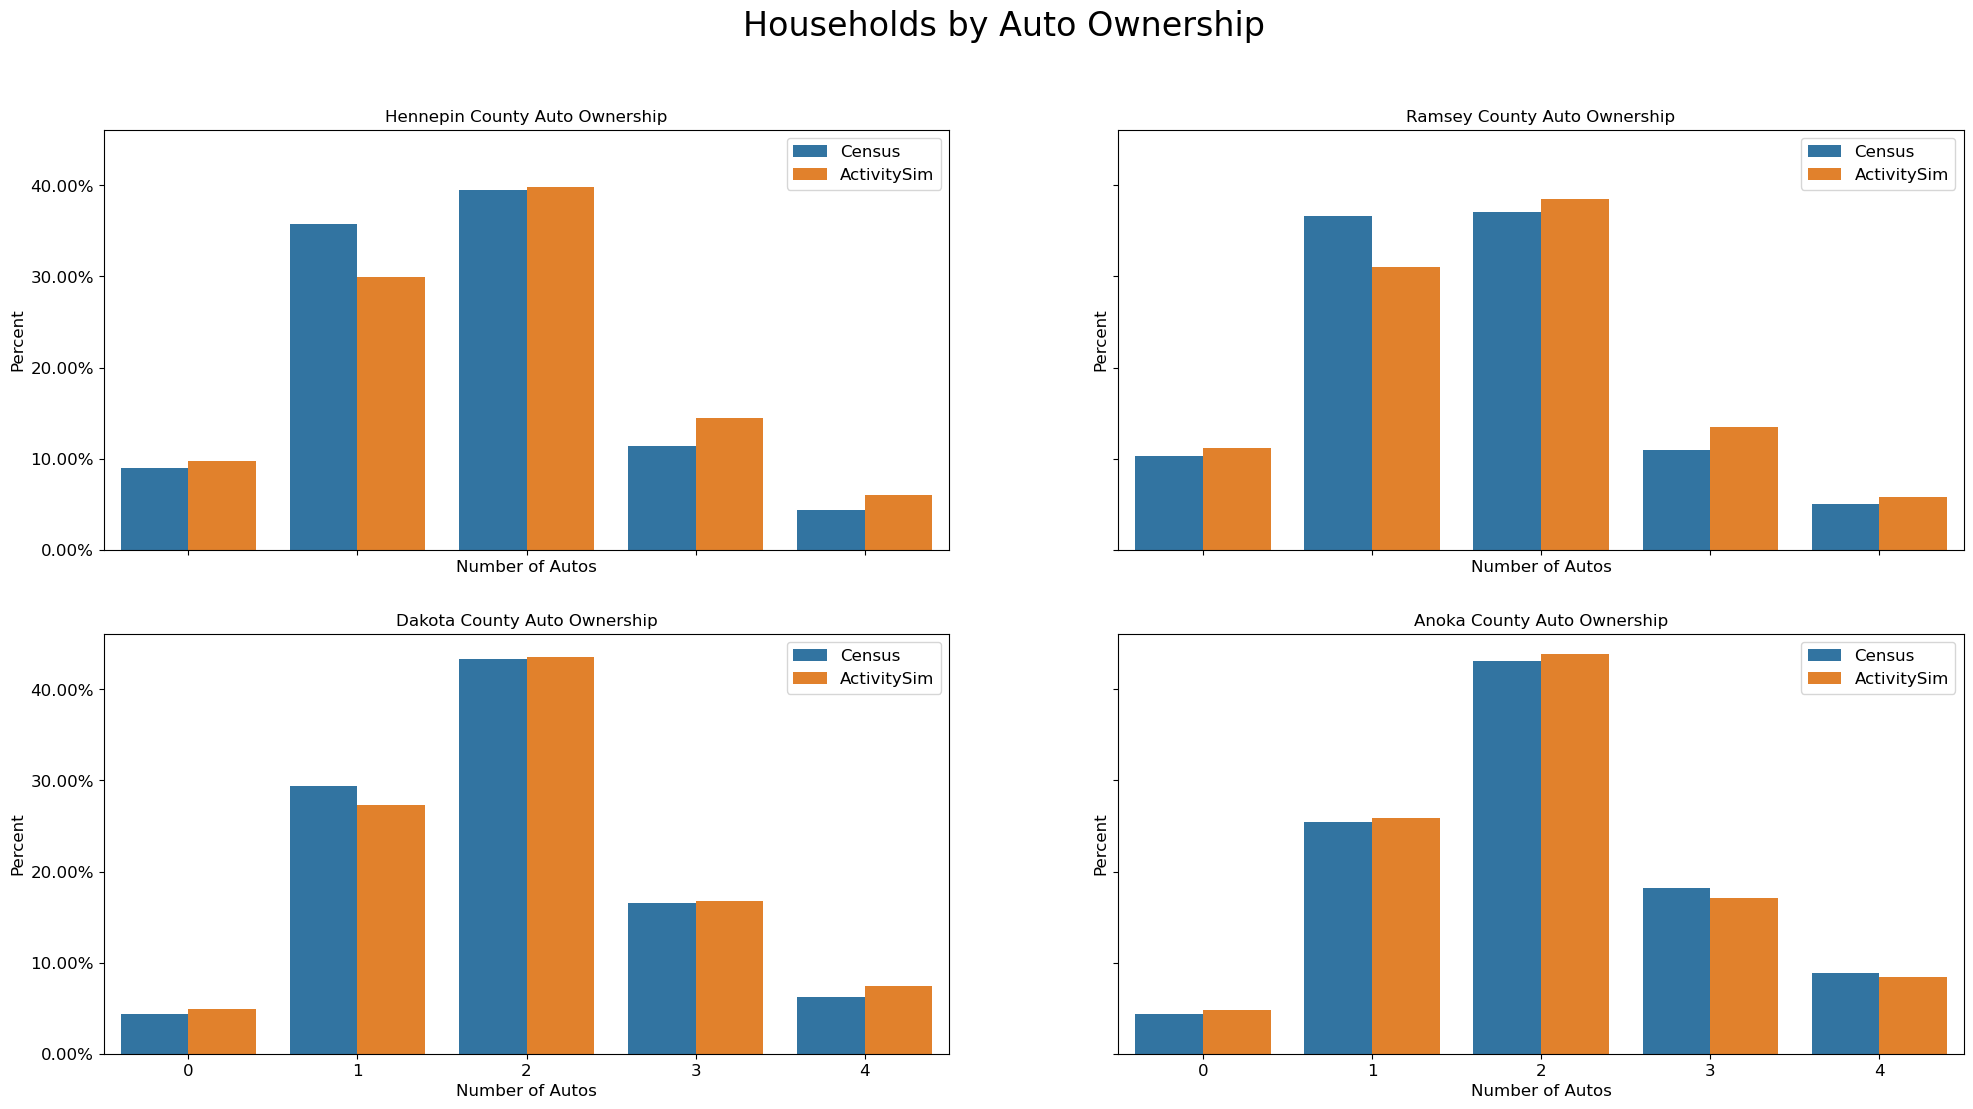

In [10]:
counties_this_cell = ['Hennepin', 'Ramsey', 'Dakota', 'Anoka']
plot_data[plot_data.isin(counties_this_cell)]

fig, ax = plt.subplots(2, 2, figsize=(24, 12), sharey = True, sharex = True)
fig.suptitle(f"Households by Auto Ownership", fontsize=24)
for c, p in zip(counties_this_cell, np.arange(1, len(counties_this_cell) + 1)):
    ax = plt.subplot(220 + p)
    plt_dat = plot_data[plot_data['home_county'] == c]
    sns.barplot(data=plt_dat, x='auto_ownership', y='value', hue='variable')
    plt.title(f"{c} County Auto Ownership")
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Percent', fontsize=12)
    plt.xlabel('Number of Autos', fontsize=12)
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.2%}'))
plt.show()

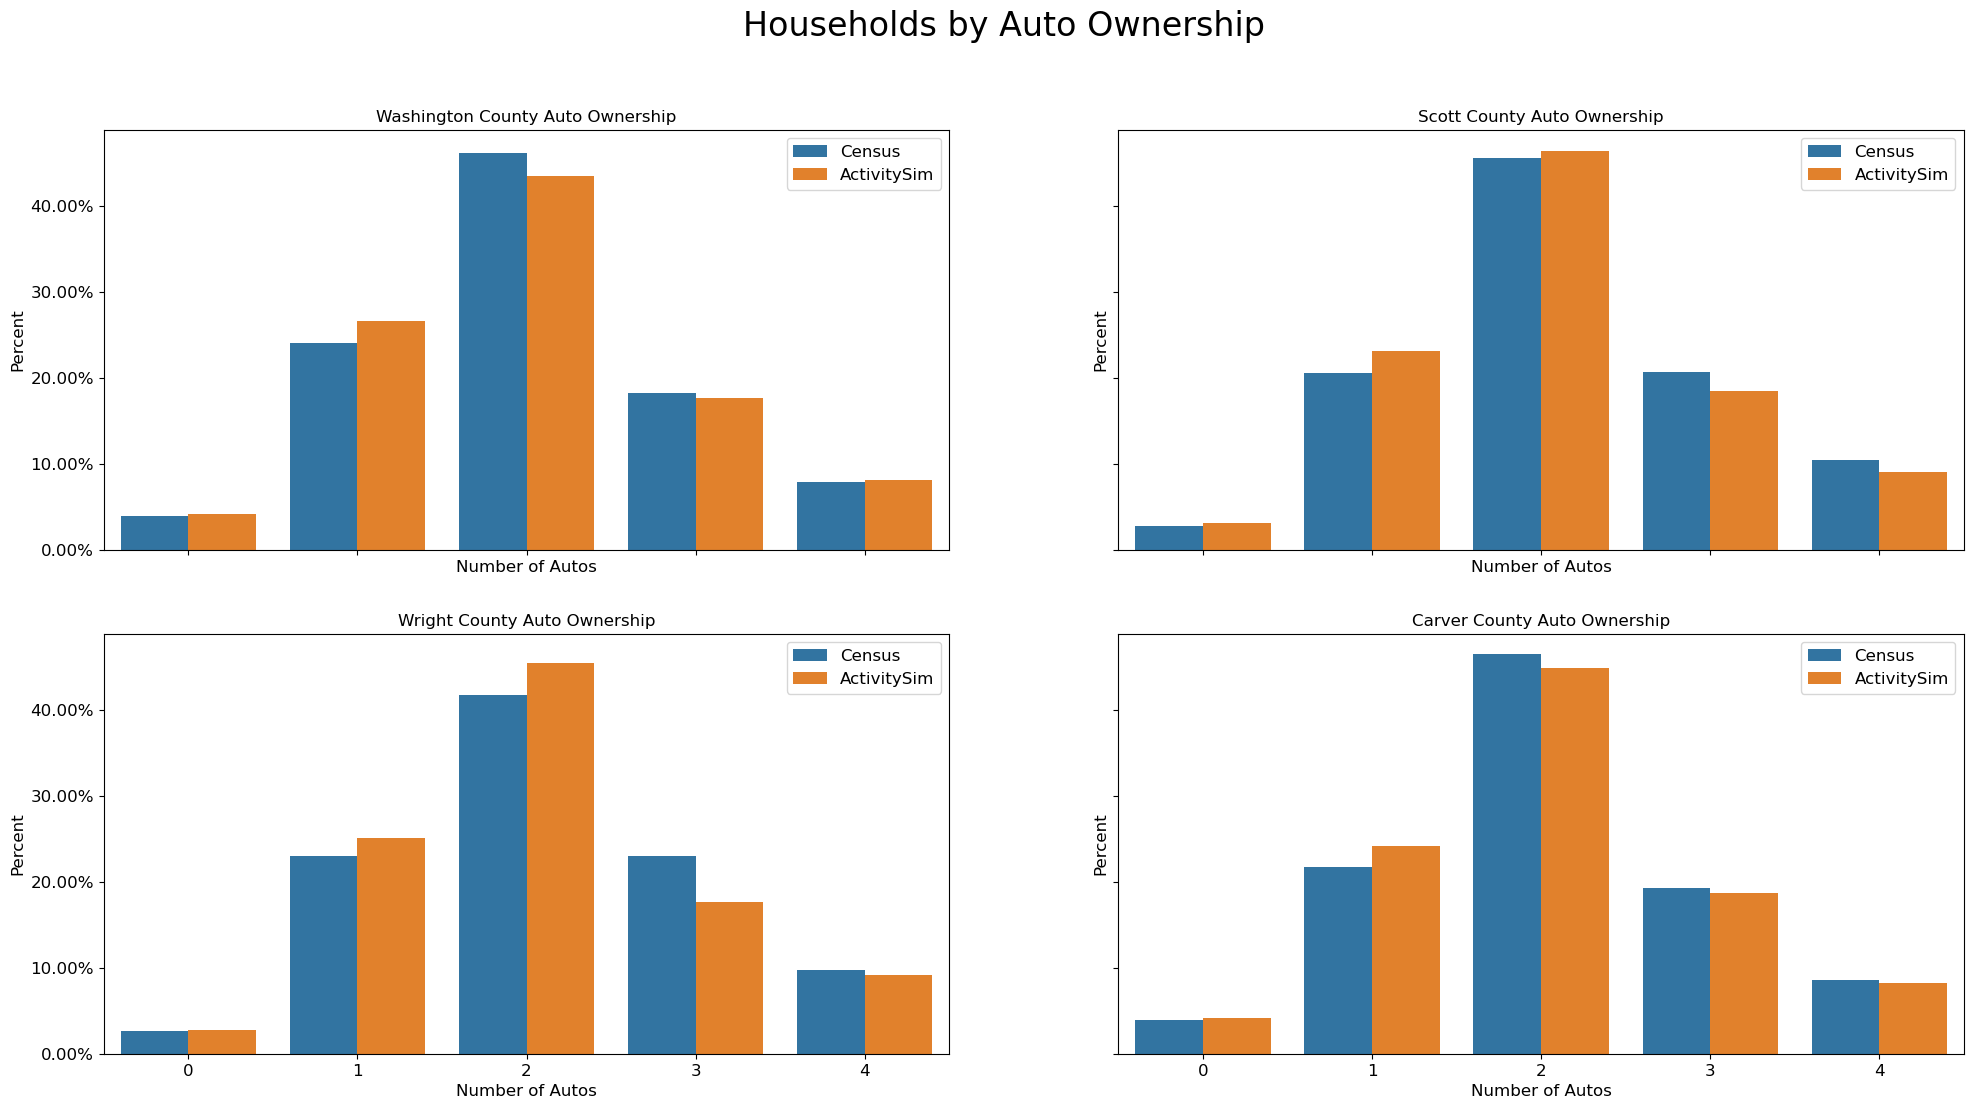

In [11]:
counties_this_cell = ['Washington', 'Scott', 'Wright', 'Carver']
plot_data[plot_data.isin(counties_this_cell)]

fig, ax = plt.subplots(2, 2, figsize=(24, 12), sharey = True, sharex = True)
fig.suptitle(f"Households by Auto Ownership", fontsize=24)
for c, p in zip(counties_this_cell, np.arange(1, len(counties_this_cell) + 1)):
    ax = plt.subplot(220 + p)
    plt_dat = plot_data[plot_data['home_county'] == c]
    sns.barplot(data=plt_dat, x='auto_ownership', y='value', hue='variable')
    plt.title(f"{c} County Auto Ownership")
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Percent', fontsize=12)
    plt.xlabel('Number of Autos', fontsize=12)
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.2%}'))
plt.show()

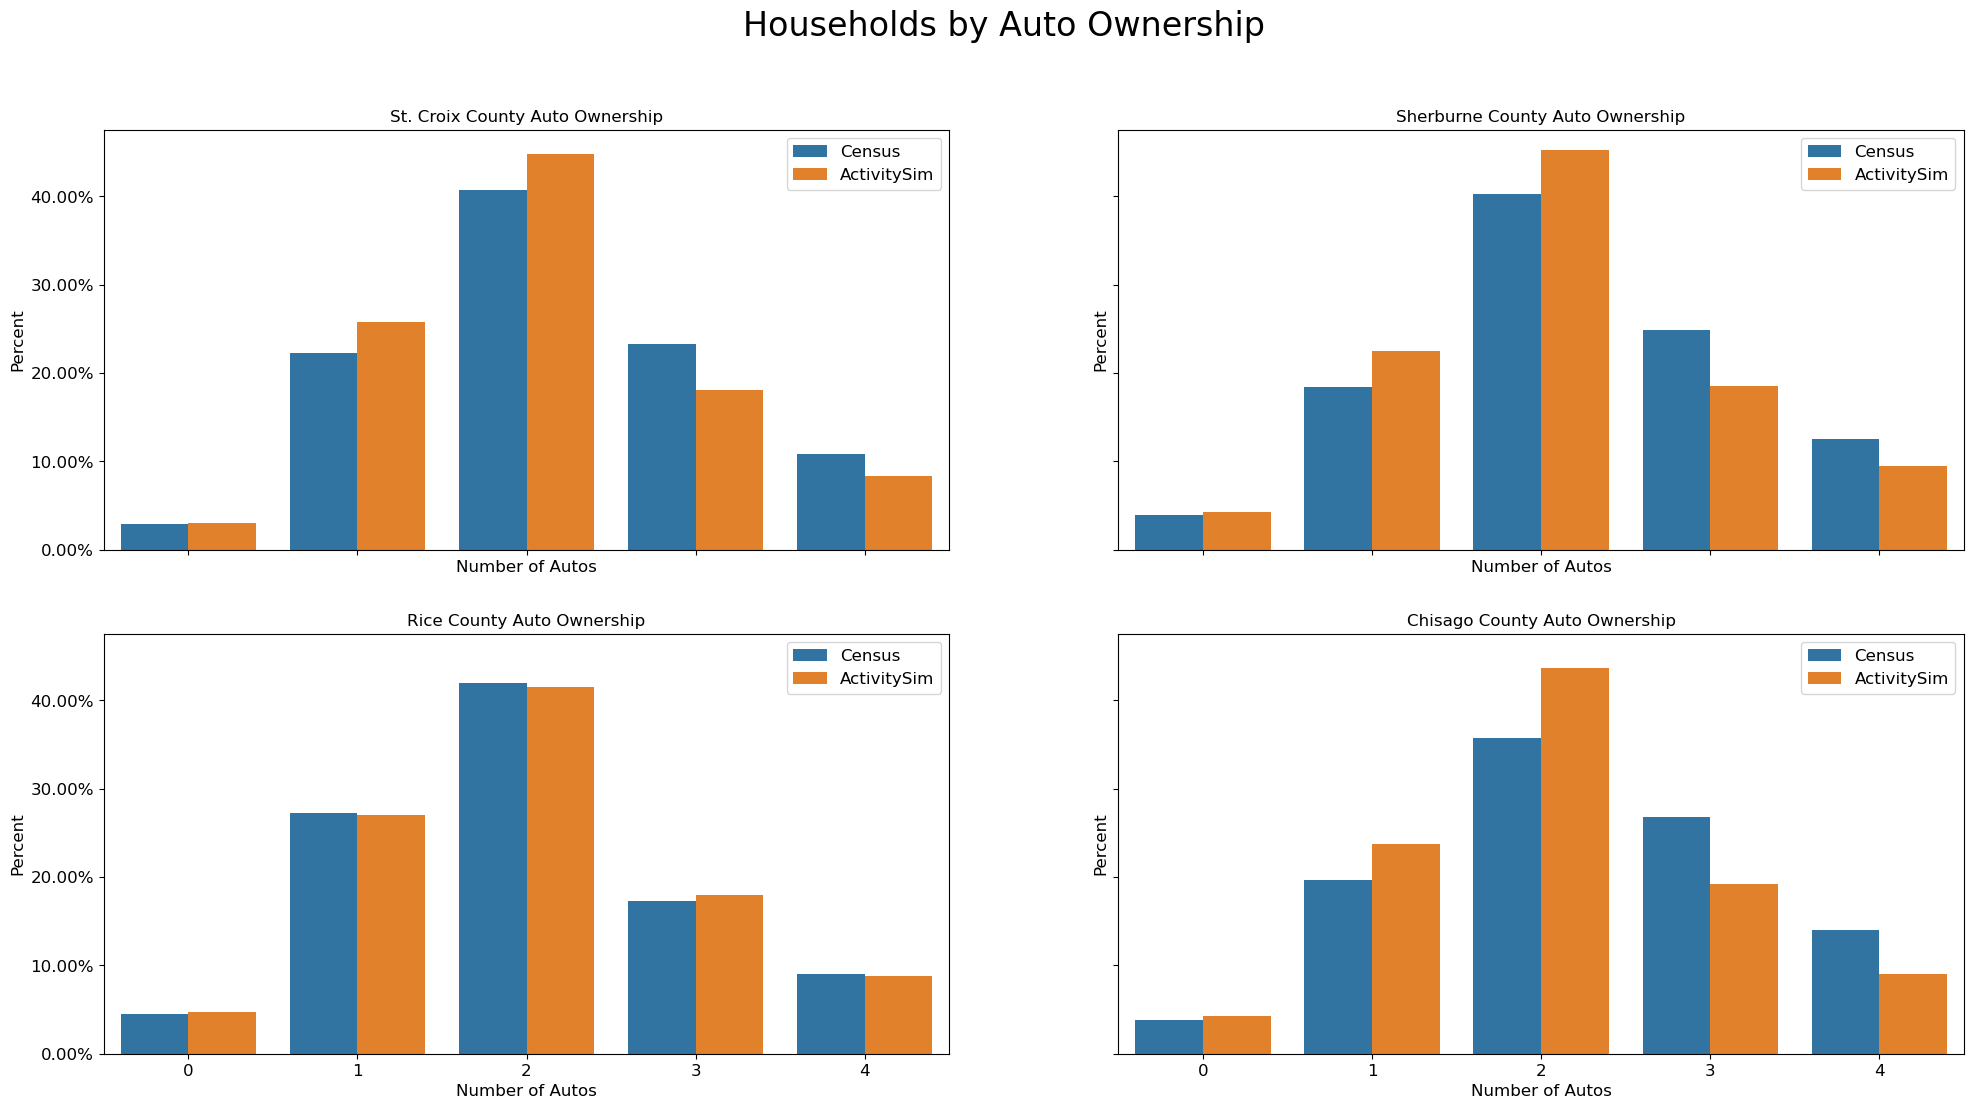

In [12]:
counties_this_cell = ['St. Croix', 'Sherburne', 'Rice', 'Chisago']
plot_data[plot_data.isin(counties_this_cell)]

fig, ax = plt.subplots(2, 2, figsize=(24, 12), sharey = True, sharex = True)
fig.suptitle(f"Households by Auto Ownership", fontsize=24)
for c, p in zip(counties_this_cell, np.arange(1, len(counties_this_cell) + 1)):
    ax = plt.subplot(220 + p)
    plt_dat = plot_data[plot_data['home_county'] == c]
    sns.barplot(data=plt_dat, x='auto_ownership', y='value', hue='variable')
    plt.title(f"{c} County Auto Ownership")
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Percent', fontsize=12)
    plt.xlabel('Number of Autos', fontsize=12)
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.2%}'))
plt.show()

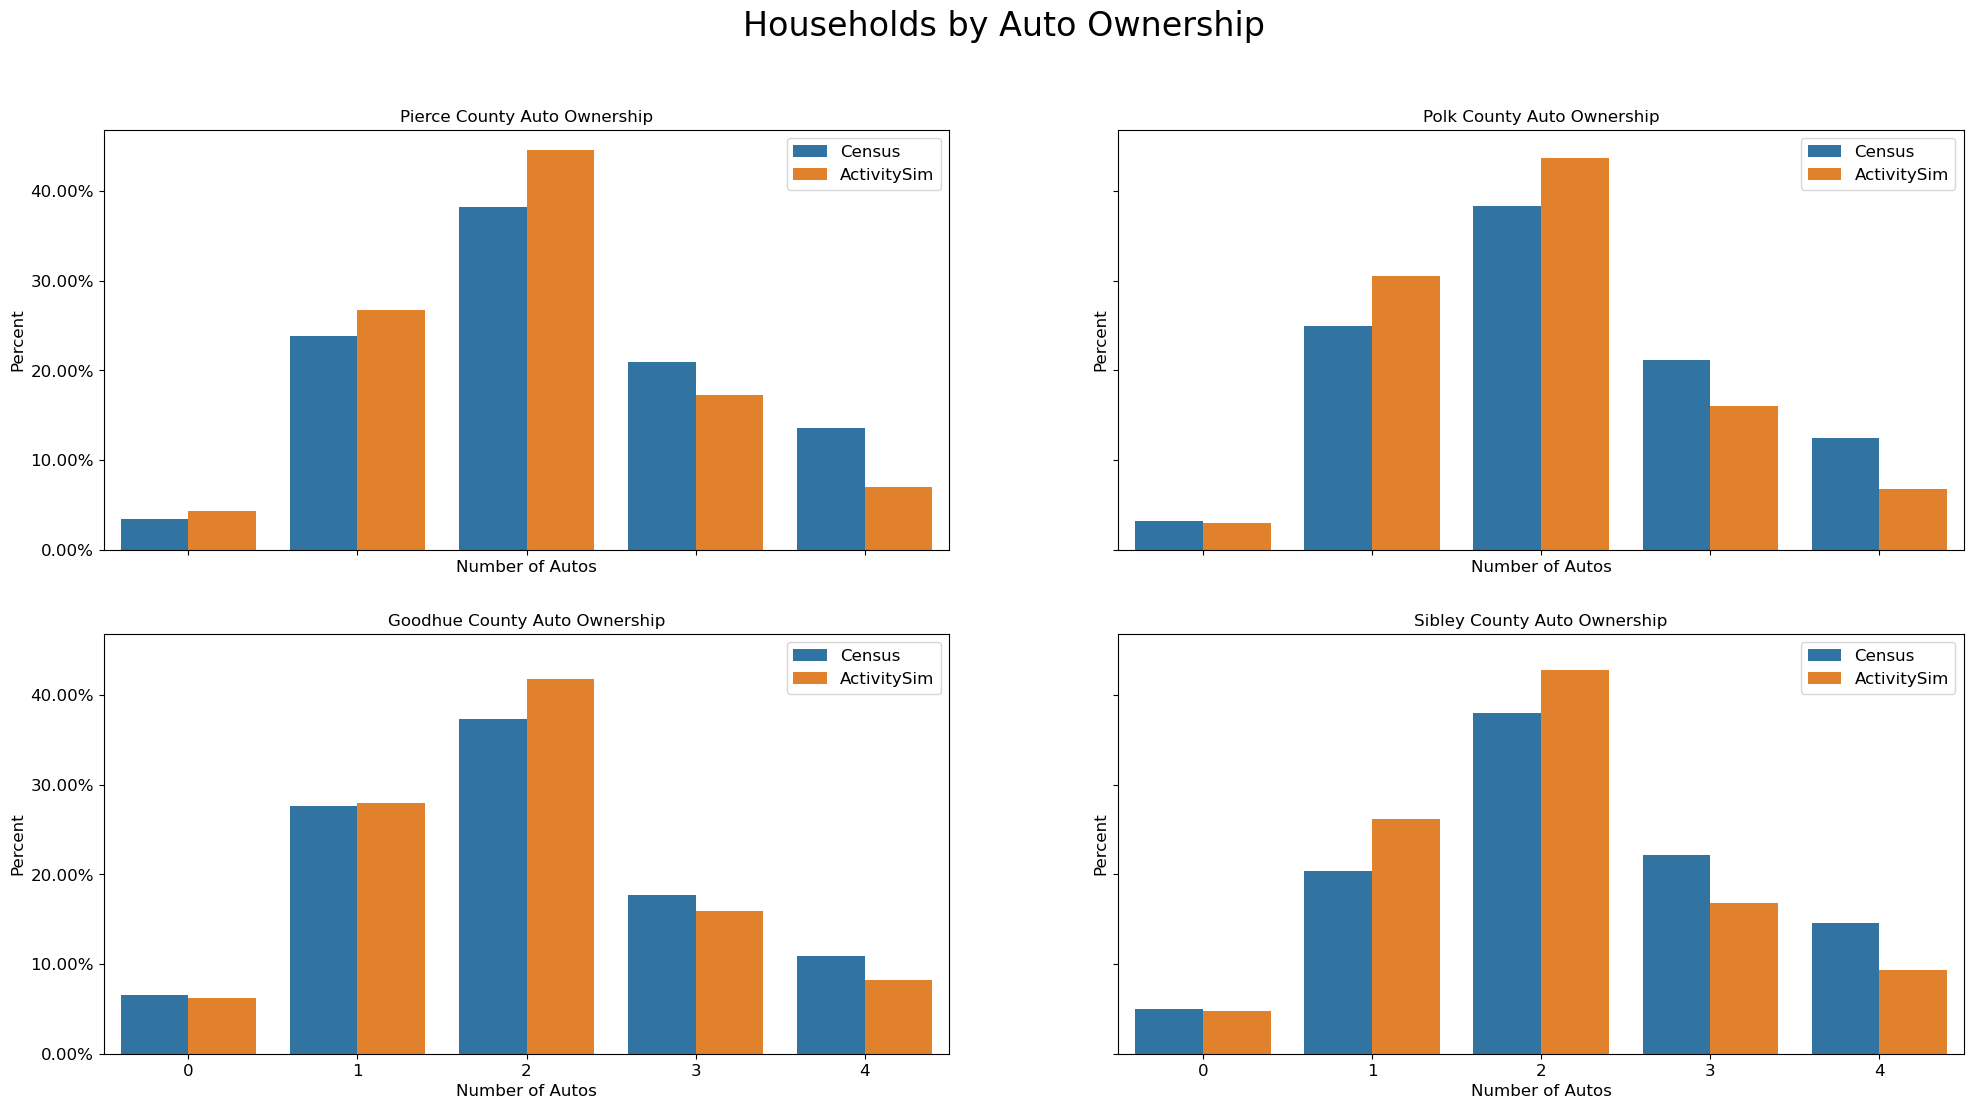

In [13]:
counties_this_cell = ['Pierce', 'Polk', 'Goodhue', 'Sibley']
plot_data[plot_data.isin(counties_this_cell)]

fig, ax = plt.subplots(2, 2, figsize=(24, 12), sharey = True, sharex = True)
fig.suptitle(f"Households by Auto Ownership", fontsize=24)
for c, p in zip(counties_this_cell, np.arange(1, len(counties_this_cell) + 1)):
    ax = plt.subplot(220 + p)
    plt_dat = plot_data[plot_data['home_county'] == c]
    sns.barplot(data=plt_dat, x='auto_ownership', y='value', hue='variable')
    plt.title(f"{c} County Auto Ownership")
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Percent', fontsize=12)
    plt.xlabel('Number of Autos', fontsize=12)
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.2%}'))
plt.show()

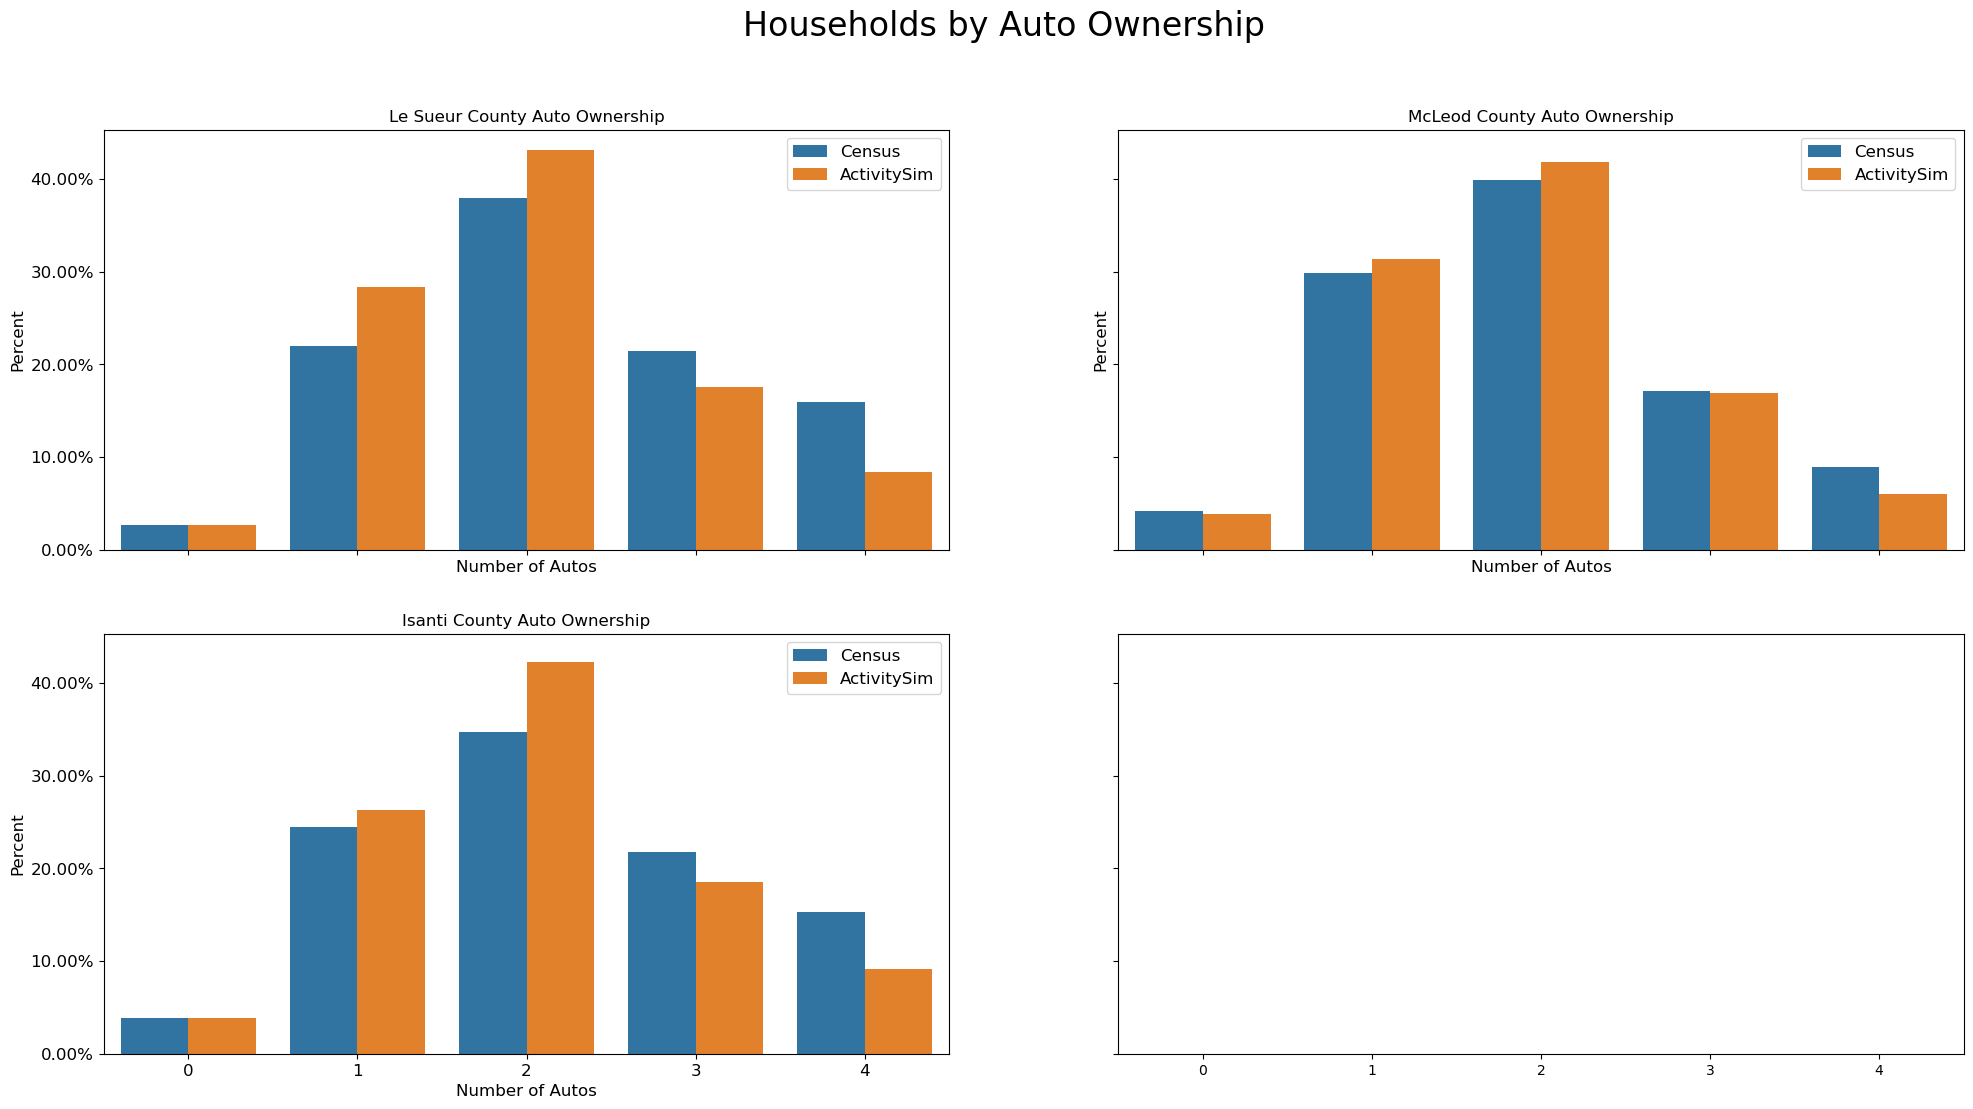

In [14]:
counties_this_cell = ['Le Sueur', 'McLeod', 'Isanti']
plot_data[plot_data.isin(counties_this_cell)]

fig, ax = plt.subplots(2, 2, figsize=(24, 12), sharey = True, sharex = True)
fig.suptitle(f"Households by Auto Ownership", fontsize=24)
for c, p in zip(counties_this_cell, np.arange(1, len(counties_this_cell) + 1)):
    ax = plt.subplot(220 + p)
    plt_dat = plot_data[plot_data['home_county'] == c]
    sns.barplot(data=plt_dat, x='auto_ownership', y='value', hue='variable')
    plt.title(f"{c} County Auto Ownership")
    plt.legend(fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel('Percent', fontsize=12)
    plt.xlabel('Number of Autos', fontsize=12)
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:.2%}'))
plt.show()